In [588]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import scale
import matplotlib as plt
%matplotlib inline

In [716]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = eval(formula)
    plt.pyplot.scatter(x = data[:,0], y = data[:,1], c = data[:,-1], cmap=plt.colors.ListedColormap(colors))
    plt.pyplot.plot(x, y)  
    plt.pyplot.show()

### Generate Data

In [704]:
mean1 = [-5,-5]
mean2 = [5,5]
cov = [3,0],[0,3]
size = [100]

In [705]:
data1 = np.random.multivariate_normal(mean1, cov, size)
data2 = np.random.multivariate_normal(mean2, cov, size)
labels1 = np.ones((100,1))
labels2 = np.ones((100,1))*-1
data1 = np.hstack((data1, np.ones((100,1)), labels1))
data2 = np.hstack((data2, np.ones((100,1)),labels2))
data = np.vstack((data1,data2))
data = shuffle(data)

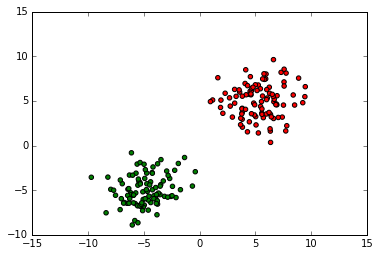

In [715]:
colors = ['red','green']
plt.pyplot.scatter(x = data[:,0], y = data[:,1], c = data[:,-1], cmap=plt.colors.ListedColormap(colors))

### Initiate Weights, tuning paramets etc...

### Delta rule

In [701]:
def delta(data, weights, n):
    inner_matrix = (np.dot(weights,np.transpose(data[:,:-1]))-data[:,-1])
    return np.dot(inner_matrix,data[:,:-1])*-n

In [702]:
def update_weights(data,weights,n):
    delta_ = delta(data,weights,n)
    new_weights = weights + delta_
    print(sum(delta_[0]))
    return new_weights/sum(new_weights[0])

In [ ]:
weights = np.random.normal(0,1,[1,3])
n = 0.01
for i in range(5):
    line = '{}*x-{}'.format(-weights[0][0]/weights[0][1],weights[0][2]/weights[0][1])
    graph(line, range(-20, 20))
    weights = update_weights(data,weights,n)

### Feed forward

In [737]:
weights = np.random.normal(0,1,[3,2])

In [738]:
weights

array([[ 0.39447141, -1.30049054],
       [-0.28901895, -0.42020039],
       [-0.65101292, -0.16499774]])

In [756]:
def transfer_function(x):
    return 2/(1+np.exp(-x))-1

def transfer_derivative(x):
    f = transfer_function(x)
    return (1+f)*(1-f)/2

def forward_pass(data, weights, layer):
    inner_matrix = np.dot(weights[:,layer],np.transpose(data[:,:-1]))
    return np.vectorize(transfer_function)(inner_matrix)


In [757]:
def backward_pass(x, y):
    return np.multiply(x,transfer_derivative(y))

def first_backward_pass(out, labels):
    return backward_pass(out-labels,labels)

def second_backward_pass(V,H,delta_o):
    return backward_pass(np.dot(np.transpose(V),delta_o),H)
    

In [759]:
H = forward_pass(data, weights, 0)

In [766]:
np.shape(np.transpose(data[:,:-1]))

(3, 200)

In [773]:
np.shape(H)

(200,)